<a href="https://colab.research.google.com/github/AdekingDev/Numerical_project/blob/main/part1_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import animation, rc
from IPython.display import HTML

In [ ]:
#Define the initial condition of the simulation

mass = 2400  # mass of the rocket and payload in kg
fuel_mass = 102855  # mass of the fuel in kg
fuel_rate = 5000  # fuel consumption rate in kg/s
thrust = 28700000  # force of the rocket's engines in N
initial_velocity = 0  # initial velocity of the rocket in m/s
initial_altitude = 0  # initial altitude of the rocket in m

initial_position = [0, 0] #position of rocket (x,y)

# Set the time step and duration of the simulation
dt = 0.1  # time step in seconds
duration = 300  # duration of the simulation in seconds
def g(mass, radius):
  G=6.6743*10**-11
  G2=G*(mass)/(radius*radius)
  return G2
# Set the gravitational acceleration
g1 = g(5.972 * 10**24,6371000)  # gravitational acceleration in m/s^2 for Earth
g2 = g(6.39 * 10**23,3389500) # Masrs
g3= g(4.867 * 10**24,6051800) # Venus
# Initialize variables to store the position and velocity of the rocket over time
time = [0]
altitude = [initial_altitude]
velocity = [initial_velocity]

position = [initial_position]

def calculate(g):
  for t in range(1, duration + 1):
    current_fuel_mass = fuel_mass - fuel_rate * (t - 1) * dt  # Calculate the force of the rocket's engines
    if current_fuel_mass < 0:
        current_fuel_mass = 0
    current_mass = mass + current_fuel_mass
    current_thrust = thrust * current_fuel_mass / fuel_mass
    acceleration = current_thrust / current_mass - g   # Calculate the acceleration of the rocket
    
    # Use the Euler method to update the velocity and position of the rocket
    velocity.append(velocity[-1] + acceleration * dt)
    altitude.append(altitude[-1] + velocity[-1] * dt)
    time.append(time[-1] + dt)
    position.append([position[-1][0] + velocity[-1] * dt, position[-1][1]])

calculate(g1) #Earth
#calculate(g2) #Mars
#calculate(g3)  #Venus

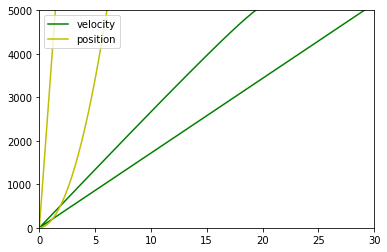

In [ ]:
# Plot the position and velocity of the rocket over time
fig, ax = plt.subplots()


x = []
y = []
z = []

def animate(i):

  x.append(time[i])
  y.append(velocity[i])
  z.append(position[i][0])
  
  ax.clear()
  ax.plot(x, y,"g", label="velocity")
  ax.plot(x,z,"y", label="position")
  ax.set_xlim(( 0, 30))
  ax.set_ylim(( 0, 5000))
  plt.legend(loc="upper left")
  
  


anim = animation.FuncAnimation(fig, animate, frames=300, interval=100, repeat=False)
HTML(anim.to_html5_video()) 

